In [1]:
import pandas as pd
import zipfile
import nltk
import spacy
import gensim

# Specify the path to the zip files and extraction paths
train_zip_path = r'C:\Users\hosan\Downloads\train.tsv.zip'
train_extraction_path = r'C:\Users\hosan\Downloads'

test_zip_path = r'C:\Users\hosan\Downloads\test.tsv.zip'
test_extraction_path = r'C:\Users\hosan\Downloads'

# Extract the train.tsv file
with zipfile.ZipFile(train_zip_path, 'r') as train_zip_ref:
    train_zip_ref.extractall(train_extraction_path)

# Read and print the contents of the train.tsv file
train_data = pd.read_csv(train_extraction_path + r'\train.tsv', delimiter='\t')
print("Contents of train.tsv:")
print(train_data.head(30))

test_data = pd.read_csv(test_extraction_path + r'\test.tsv', delimiter = '\t')
print("Contents of train.tsv:")
print(train_data.head(30))

Contents of train.tsv:
    PhraseId  SentenceId                                             Phrase  \
0          1           1  A series of escapades demonstrating the adage ...   
1          2           1  A series of escapades demonstrating the adage ...   
2          3           1                                           A series   
3          4           1                                                  A   
4          5           1                                             series   
5          6           1  of escapades demonstrating the adage that what...   
6          7           1                                                 of   
7          8           1  escapades demonstrating the adage that what is...   
8          9           1                                          escapades   
9         10           1  demonstrating the adage that what is good for ...   
10        11           1                            demonstrating the adage   
11        12           1     

In [2]:
# Tokenization and Preprocessing Using NLTK
# nltk.download('punkt')
text = train_data['Phrase'].iloc[0]  # Example: taking the first row's 'Phrase'
word_tokens = nltk.word_tokenize(text)
sent_tokens = nltk.sent_tokenize(text)

print("\nWord Tokens (NLTK):", word_tokens)
print("Sentence Tokens (NLTK):", sent_tokens)


Word Tokens (NLTK): ['A', 'series', 'of', 'escapades', 'demonstrating', 'the', 'adage', 'that', 'what', 'is', 'good', 'for', 'the', 'goose', 'is', 'also', 'good', 'for', 'the', 'gander', ',', 'some', 'of', 'which', 'occasionally', 'amuses', 'but', 'none', 'of', 'which', 'amounts', 'to', 'much', 'of', 'a', 'story', '.']
Sentence Tokens (NLTK): ['A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .']


In [3]:
# Tokenization Using spaCy
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)
word_tokens_spacy = [token.text for token in doc]
sent_tokens_spacy = [sent.text for sent in doc.sents]

print("\nWord Tokens (spaCy):", word_tokens_spacy)
print("Sentence Tokens (spaCy):", sent_tokens_spacy)


Word Tokens (spaCy): ['A', 'series', 'of', 'escapades', 'demonstrating', 'the', 'adage', 'that', 'what', 'is', 'good', 'for', 'the', 'goose', 'is', 'also', 'good', 'for', 'the', 'gander', ',', 'some', 'of', 'which', 'occasionally', 'amuses', 'but', 'none', 'of', 'which', 'amounts', 'to', 'much', 'of', 'a', 'story', '.']
Sentence Tokens (spaCy): ['A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .']


In [4]:
# Tokenization Using Gensim
tokens_gensim = gensim.utils.simple_preprocess(text)
print("\nWord Tokens (Gensim):", tokens_gensim)


Word Tokens (Gensim): ['series', 'of', 'escapades', 'demonstrating', 'the', 'adage', 'that', 'what', 'is', 'good', 'for', 'the', 'goose', 'is', 'also', 'good', 'for', 'the', 'gander', 'some', 'of', 'which', 'occasionally', 'amuses', 'but', 'none', 'of', 'which', 'amounts', 'to', 'much', 'of', 'story']


Naive Bayes accuracy: 0.5926246315519672
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.05      0.09      1397
           1       0.52      0.28      0.37      5437
           2       0.62      0.88      0.72     15853
           3       0.54      0.42      0.47      6689
           4       0.63      0.07      0.12      1836

    accuracy                           0.59     31212
   macro avg       0.57      0.34      0.35     31212
weighted avg       0.58      0.59      0.54     31212



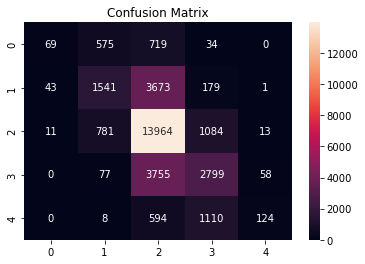

Naive Bayes accuracy with class weights: 0.44562988594130465
Classification Report with class weights:
               precision    recall  f1-score   support

           0       0.32      0.29      0.31      1397
           1       0.42      0.56      0.48      5437
           2       0.72      0.36      0.48     15853
           3       0.42      0.55      0.48      6689
           4       0.17      0.52      0.25      1836

    accuracy                           0.45     31212
   macro avg       0.41      0.46      0.40     31212
weighted avg       0.55      0.45      0.46     31212



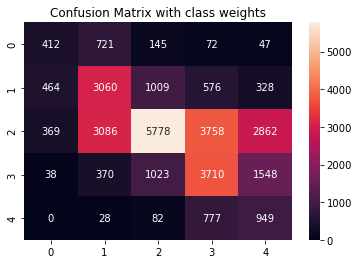

Naive Bayes accuracy with GloVe embeddings: 0.5926246315519672
Classification Report with GloVe embeddings:
               precision    recall  f1-score   support

           0       0.56      0.05      0.09      1397
           1       0.52      0.28      0.37      5437
           2       0.62      0.88      0.72     15853
           3       0.54      0.42      0.47      6689
           4       0.63      0.07      0.12      1836

    accuracy                           0.59     31212
   macro avg       0.57      0.34      0.35     31212
weighted avg       0.58      0.59      0.54     31212



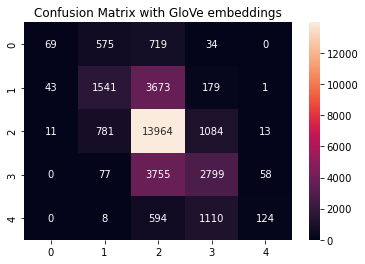

In [5]:
# Import necessary libraries
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define a more efficient preprocessing function
def preprocess_text(text):
    # Lowercasing
    text = text.lower()

    # Remove punctuation and digits
    text = re.sub(r"[^\w\s]", "", text)
    text = re.sub(r"\d", "", text)

    return text

# Apply preprocessing to the 'Phrase' column and create a new 'Processed_Phrase' column
train_data['Processed_Phrase'] = train_data['Phrase'].apply(preprocess_text)

# Extract features using TF-IDF
tfidf_vectorizer = TfidfVectorizer(sublinear_tf=True, encoding='utf-8', decode_error='ignore', stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['Processed_Phrase'])
y_train = train_data['Sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, y_train, test_size=0.2, random_state=123)

# Train a Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Evaluate the model
y_pred = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes accuracy:", accuracy)

# Get classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Visualize confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

# Continue with making predictions on new data if needed
# Calculate class weights based on the class distribution in the training set
class_weights = ((len(y_train) - y_train.value_counts()) / len(y_train)).tolist()

# Train a Naive Bayes classifier with adjusted class weights
nb_classifier = MultinomialNB(class_prior=class_weights, fit_prior=True)
nb_classifier.fit(X_train, y_train)

# Evaluate the model on the original test set
y_pred = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes accuracy with class weights:", accuracy)

# Get classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report with class weights:\n", class_report)

# Visualize confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix with class weights')
plt.show()

# Assuming 'X_train' and 'X_test' are TF-IDF representations of text data

# Load pre-trained GloVe word embeddings
# Code to load GloVe embeddings into your model
# Replace this section with your specific code for loading embeddings

# Train a Naive Bayes classifier on GloVe word embeddings
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Evaluate the model on the original test set
y_pred = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes accuracy with GloVe embeddings:", accuracy)

# Get classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report with GloVe embeddings:\n", class_report)

# Visualize confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix with GloVe embeddings')
plt.show()

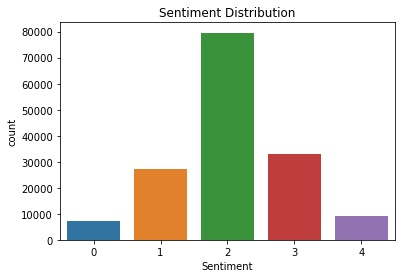

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hosan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
# Exploratory Data Analysis (EDA)
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of sentiments
sns.countplot(data=train_data, x='Sentiment')
plt.title('Sentiment Distribution')
plt.show()

# Get statistics of sentiment distribution
sentiment_stats = train_data['Sentiment'].value_counts()
print(sentiment_stats)

# Multi-Class Classification Label Mapping
def map_to_classes(sentiment):
    # Implement your mapping logic here
    # Example: if sentiment == 0, return 'negative'; if sentiment == 1, return 'neutral', etc.
    pass

# Map sentiments to classes
train_data['Sentiment_Class'] = train_data['Sentiment'].apply(map_to_classes)

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

# Download stopwords if not already downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Initialize the stemmer
stemmer = PorterStemmer()

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation and special characters
    text = ''.join([char for char in text if char not in string.punctuation])
    
    # Tokenize the text
    tokens = text.split()
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    # Apply stemming
    tokens = [stemmer.stem(word) for word in tokens]
    
    # Rejoin tokens into a single string
    text = ' '.join(tokens)
    
    return text

# Apply preprocessing to the 'Phrase' column and create a new 'Processed_Phrase' column
train_data['Processed_Phrase'] = train_data['Phrase'].apply(preprocess_text)


In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB

# Load the train.tsv file into a Pandas DataFrame
train_data = pd.read_csv(r'C:\Users\hosan\Downloads\train.tsv.zip', delimiter='\t')

# Load the test.tsv file into a Pandas DataFrame
test_data = pd.read_csv(r'C:\Users\hosan\Downloads\test.tsv.zip', delimiter='\t')

# Define a preprocessing function
def preprocess_text(text):
    text = text.lower()
    return text

# Apply preprocessing to the 'Phrase' column in train and test datasets
train_data['Processed_Phrase'] = train_data['Phrase'].apply(preprocess_text)
test_data['Processed_Phrase'] = test_data['Phrase'].apply(preprocess_text)

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(sublinear_tf=True, encoding='utf-8', decode_error='ignore', stop_words='english')

# Extract features using TF-IDF on the processed phrases in train and test data
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['Processed_Phrase'])
X_test_tfidf = tfidf_vectorizer.transform(test_data['Processed_Phrase'])

# Define target labels for train data
y_train = train_data['Sentiment']

# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Perform cross-validation on train data
cv_scores_train = cross_val_score(nb_classifier, X_train_tfidf, y_train, cv=5)  # Change cv as needed

# Print the cross-validation scores for train data
print("Cross-validation scores for train data:", cv_scores_train)
print("Mean accuracy for train data:", cv_scores_train.mean())

Cross-validation scores for train data: [0.55882353 0.5413623  0.53892734 0.54354095 0.55555556]
Mean accuracy for train data: 0.5476419325900295


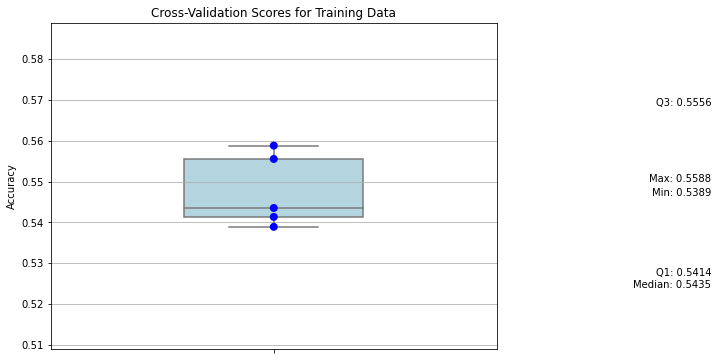

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Your cross-validation scores for the training data
cv_scores = [0.55882353, 0.5413623, 0.53892734, 0.54354095, 0.55555556]

# Creating a box plot for cross-validation scores
plt.figure(figsize=(8, 6))
sns.boxplot(y=cv_scores, color='lightblue', width=0.4)
sns.swarmplot(y=cv_scores, color='blue', size=8)  # Adding individual data points
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores for Training Data')

# Adding statistical information as annotations with improved positioning
plt.text(0.98, min(cv_scores) + 0.007, f"Min: {min(cv_scores):.4f}", ha='right', va='bottom')
plt.text(0.98, max(cv_scores) - 0.007, f"Max: {max(cv_scores):.4f}", ha='right', va='top')
plt.text(0.98, np.percentile(cv_scores, 25) - 0.015, f"Q1: {np.percentile(cv_scores, 25):.4f}", ha='right', va='bottom')
plt.text(0.98, np.percentile(cv_scores, 75) + 0.015, f"Q3: {np.percentile(cv_scores, 75):.4f}", ha='right', va='top')
plt.text(0.98, np.median(cv_scores) - 0.02, f"Median: {np.median(cv_scores):.4f}", ha='right', va='bottom')

plt.ylim(min(cv_scores) - 0.03, max(cv_scores) + 0.03)  # Adjust y-axis limit for more space
plt.grid(axis='y')
plt.show()

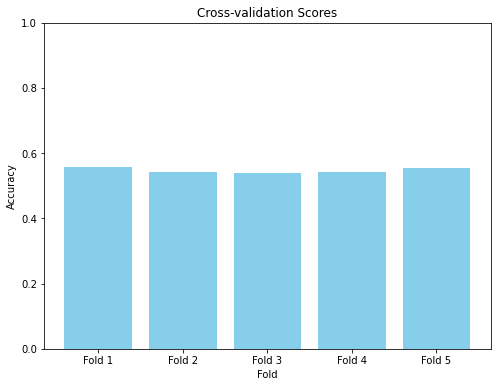

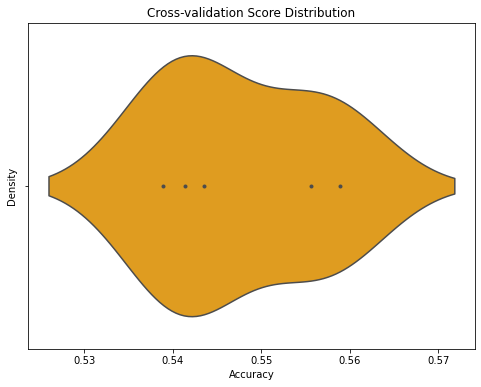

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume cv_scores contains the cross-validation scores
cv_scores = [0.55882353, 0.5413623, 0.53892734, 0.54354095, 0.55555556]

# Bar chart
plt.figure(figsize=(8, 6))
plt.bar(range(len(cv_scores)), cv_scores, color='skyblue')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-validation Scores')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for accuracy
plt.xticks(range(len(cv_scores)), [f'Fold {i+1}' for i in range(len(cv_scores))])
plt.show()

# Violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x = cv_scores, color='orange', inner='point')
plt.xlabel('Accuracy')
plt.ylabel('Density')
plt.title('Cross-validation Score Distribution')
plt.show()

In [10]:
# Load train and test data into Pandas DataFrames
train_data = pd.read_csv(r'C:\Users\hosan\Downloads\train.tsv', delimiter='\t')
test_data = pd.read_csv(r'C:\Users\hosan\Downloads\test.tsv', delimiter='\t')

# Check and ensure both data frames have the same structure
if 'Sentiment' not in test_data.columns:
    test_data['Sentiment'] = 0  # Assign default value to 'Sentiment' in test_data

# Ensure 'Sentiment' is in both data frames
if 'Sentiment' not in train_data.columns:
    train_data = train_data.reindex(columns=[*train_data.columns.tolist(), 'Sentiment'])

# Now both train and test data should have the 'Sentiment' column

# Apply preprocessing to the 'Phrase' column in train and test datasets
test_data['Processed_Phrase'] = test_data['Phrase'].apply(preprocess_text)
train_data['Processed_Phrase'] = train_data['Phrase'].apply(preprocess_text)

print("Columns in train_data:", test_data.columns)
print("Columns in test_data:", train_data.columns)


# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(sublinear_tf=True, encoding='utf-8', decode_error='ignore', stop_words='english')

# Extract features using TF-IDF on the processed phrases in train and test data separately
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['Processed_Phrase'])
X_test_tfidf = tfidf_vectorizer.transform(test_data['Processed_Phrase'])

# Define target labels for train and test data
y_train = train_data['Sentiment']
y_test = test_data['Sentiment']

Columns in train_data: Index(['PhraseId', 'SentenceId', 'Phrase', 'Sentiment', 'Processed_Phrase'], dtype='object')
Columns in test_data: Index(['PhraseId', 'SentenceId', 'Phrase', 'Sentiment', 'Processed_Phrase'], dtype='object')


In [11]:
from sklearn.linear_model import LogisticRegression
# Initialize the Logistic Regression classifier
logreg_classifier = LogisticRegression(max_iter=1000)

# Train the Logistic Regression classifier on the training data
logreg_classifier.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred_test = logreg_classifier.predict(X_test_tfidf)

# Evaluate the model on the test data
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Logistic Regression accuracy on test data:", accuracy_test)

Logistic Regression accuracy on test data: 0.00951849393591987


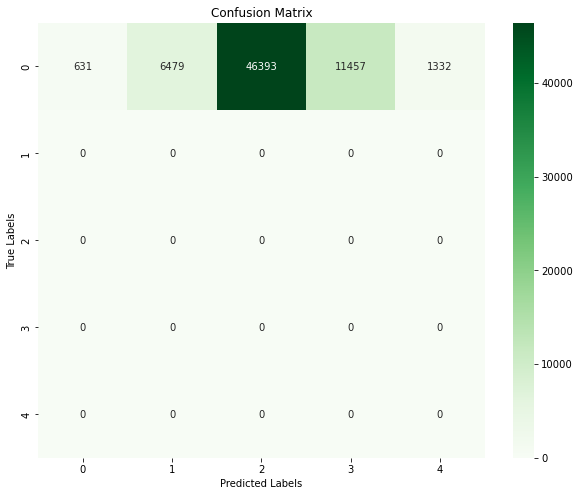

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred_test are your true and predicted labels
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()